### 【 상자 수염 그래프(Boxplot/ Box Whisker plot) 】
- 데이터의 분포 체크 및 이상치 체크
- 이상치/패턴 파악 가능함

[1] 모듈 로딩 <hr>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

[2] 데이터 준비 <hr>

In [4]:
## 파일
D_FILE = '../Data/auto_mpg.csv'

autoDF = pd.read_csv(D_FILE)
autoDF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


[3] 시각화 <hr>

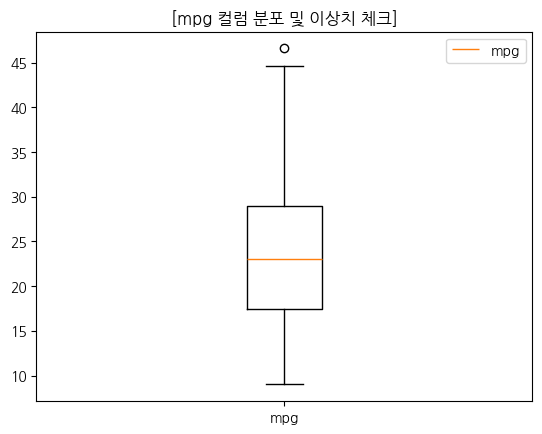

In [11]:
## -------------------------------------------
## 기본 박스 플롯
## -------------------------------------------
import koreanize_matplotlib

## 그래프 생성
plt.boxplot(autoDF['mpg'], label='mpg')

## 그래프 공통 요소
plt.title('[mpg 컬럼 분포 및 이상치 체크]')
plt.legend()
plt.xticks([1], ['mpg'])

## 그래프 화면 출력
plt.show()

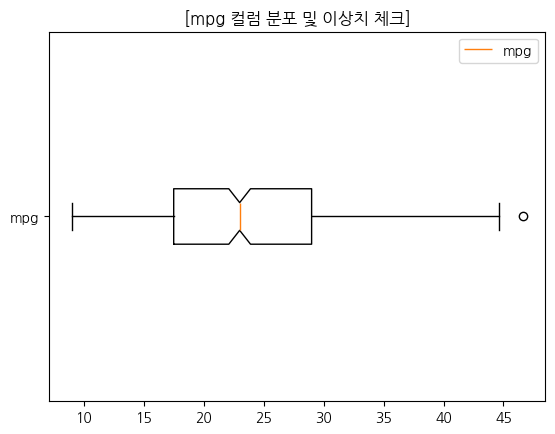

In [9]:
## -------------------------------------------
## 노치, 수평 박스그래프
## => nortch 매개변수 : True
## => vert   매개변수 : False
## -------------------------------------------
import koreanize_matplotlib

## 그래프 생성
plt.boxplot(autoDF['mpg'], label='mpg', vert=False, notch=True)

## 그래프 공통 요소
plt.title('[mpg 컬럼 분포 및 이상치 체크]')
plt.legend()
plt.yticks([1], ['mpg'])

## 그래프 화면 출력
plt.show()

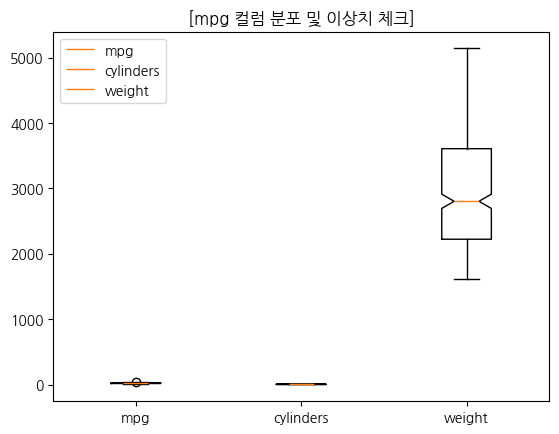

In [16]:
## -------------------------------------------
## 여러개 컬럼의 박스그래프
## => nortch 매개변수 : True
## => vert   매개변수 : False
## -------------------------------------------
## 여러개 컬럼
data_name = ['mpg','cylinders', 'weight']

## 그래프 생성
plt.boxplot(autoDF[data_name],
            label=data_name, notch=True)

## 그래프 공통 요소
plt.title('[mpg 컬럼 분포 및 이상치 체크]')
plt.legend()
plt.xticks([1,2,3], data_name)

## 그래프 화면 출력
plt.show()

C:\Users\KDT\AppData\Local\Temp\ipykernel_18504\1516341050.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


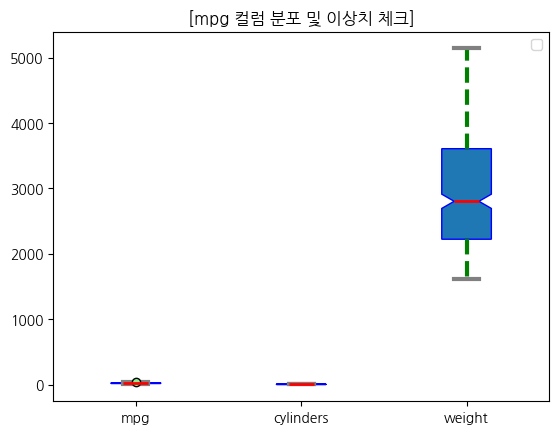

In [17]:
## -------------------------------------------
## 여러개 컬럼의 박스그래프
## => nortch 매개변수 : True
## => vert   매개변수 : False
## -------------------------------------------
## 여러개 컬럼
data_name = ['mpg','cylinders', 'weight']

## 그래프 생성
plt.boxplot(autoDF[data_name],
            notch=True,
            ## 박스 안쪽 여백색상설정
            patch_artist=True, 
            ## 이상치 설정
            flierprops=dict(markerfacecolor='lightgreen'),
            ## Q1과 최소값, Q3와 최대값 잇는 선설정
            whiskerprops=dict(color='green', linewidth=3, linestyle='--'),
            ## 최상단, 최하단 선과 직사각형을 잇는선테두리컬러
            capprops=dict(color='gray', linewidth=3), 
            ## 중앙값 설정
            medianprops=dict(color='red',linewidth=2),
            ## IQR 설정
            boxprops=dict(color='blue'))

## 그래프 공통 요소
plt.title('[mpg 컬럼 분포 및 이상치 체크]')
plt.legend()
plt.xticks([1,2,3], data_name)

## 그래프 화면 출력
plt.show()

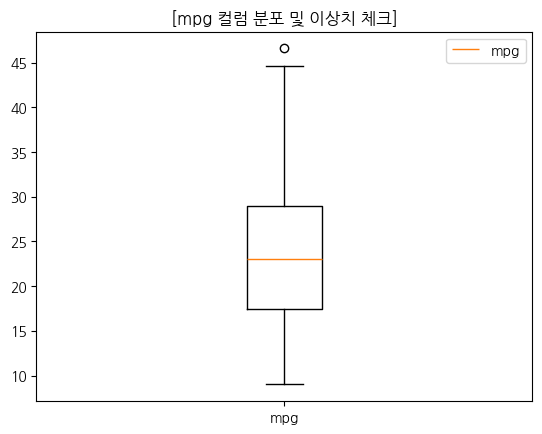

In [19]:
## -------------------------------------------
## 박스 플롯에서 이상치 값 추출
## -------------------------------------------
## 그래프 생성
boxDict = plt.boxplot(autoDF['mpg'], label='mpg')

## 그래프 공통 요소
plt.title('[mpg 컬럼 분포 및 이상치 체크]')
plt.legend()
plt.xticks([1], ['mpg'])

## 그래프 화면 출력
plt.show()

In [28]:
## => 박스플롯의 시각화 결과값 추출 : Dict 타입
for key in boxDict:
    ## => 박스플롯의 5개 통계치 값 확인
    print(key , len(boxDict[key] ) )

    for line in boxDict[key]:
        print(f' ==> {line.get_ydata()}')


## => 이상치값만 추출
boxDict['fliers'][0].get_ydata()

whiskers 2
 ==> [17.5  9. ]
 ==> [29.  44.6]
caps 2
 ==> [9. 9.]
 ==> [44.6 44.6]
boxes 1
 ==> [17.5 17.5 29.  29.  17.5]
medians 1
 ==> [23. 23.]
fliers 1
 ==> [46.6]
means 0


array([46.6])

In [29]:
## => 이상치값만 추출
outlier_v = boxDict['fliers'][0].get_ydata()

## => 해당 컬럼에 이상치값 데이터 몇 개 있는지 체크
autoDF['mpg'].value_counts()[outlier_v]



mpg
46.6    1
Name: count, dtype: int64